# Introduction

**Group 1**
1. 2702255962 - Archi Setio
2. 2702255703 - Albertus Christian
3. 2702329664 - Dominikus Sebastian Ramli
4. 2702262860 - Vincentius Andrew Lorenzo
5. 2702255956 - Vincent Tanaka
6. 2702250381 - Vincent Virgo
7. 2702255786 - Wilbert Bernardi


Data yang kami ambil adalah data mengenai member dari sebuah gym, serta data dari member-member mereka.

Link: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

# Descriptive Analytics

How does Age affect Max_BPM, Avg_BPM, or Resting_BPM?

→ Older individuals may have different heart rate patterns compared to younger ones.

How is BMI related to Fat_Percentage?

→ Does a higher BMI always indicate a higher fat percentage?

Does Workout_Frequency correlate with Calories_Burned or Fat_Percentage?

→ Do people who work out more frequently burn more calories or reduce fat percentage?

What is the relationship between Weight and Calories_Burned?

→ Do heavier individuals burn more calories per session?

Does Water_Intake affect Workout Performance (Calories_Burned or Avg_BPM)?

→ Are hydrated individuals performing better?

# Predictive Analytics
Predict calories burned using Session duration and experience level


# Dataset Retrieval

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Data Analytics/gym.csv')
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
df.info()

# Data Cleaning

In [ ]:
# Count missing values in each column
print(df.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [ ]:
print(f'Duplicated Rows: {df.duplicated().sum()}')  # Count duplicate rows
df = df.drop_duplicates()  # Remove duplicate rows

Duplicated Rows: 0


In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numbers
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Workout_Type'] = df['Workout_Type'].map({'Strength': 0, 'Cardio': 1, 'HIIT' : 2, 'Cardio': 3, 'Yoga': 4})


# Data Exploration

In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [ ]:
df.describe()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,0.474820,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,2.223022,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,0.499622,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,1.502606,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,0.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,0.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,0.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,0.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,0.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,3.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,1.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,3.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,1.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,4.000000,35.000000,3.700000,5.000000,3.000000,49.840000


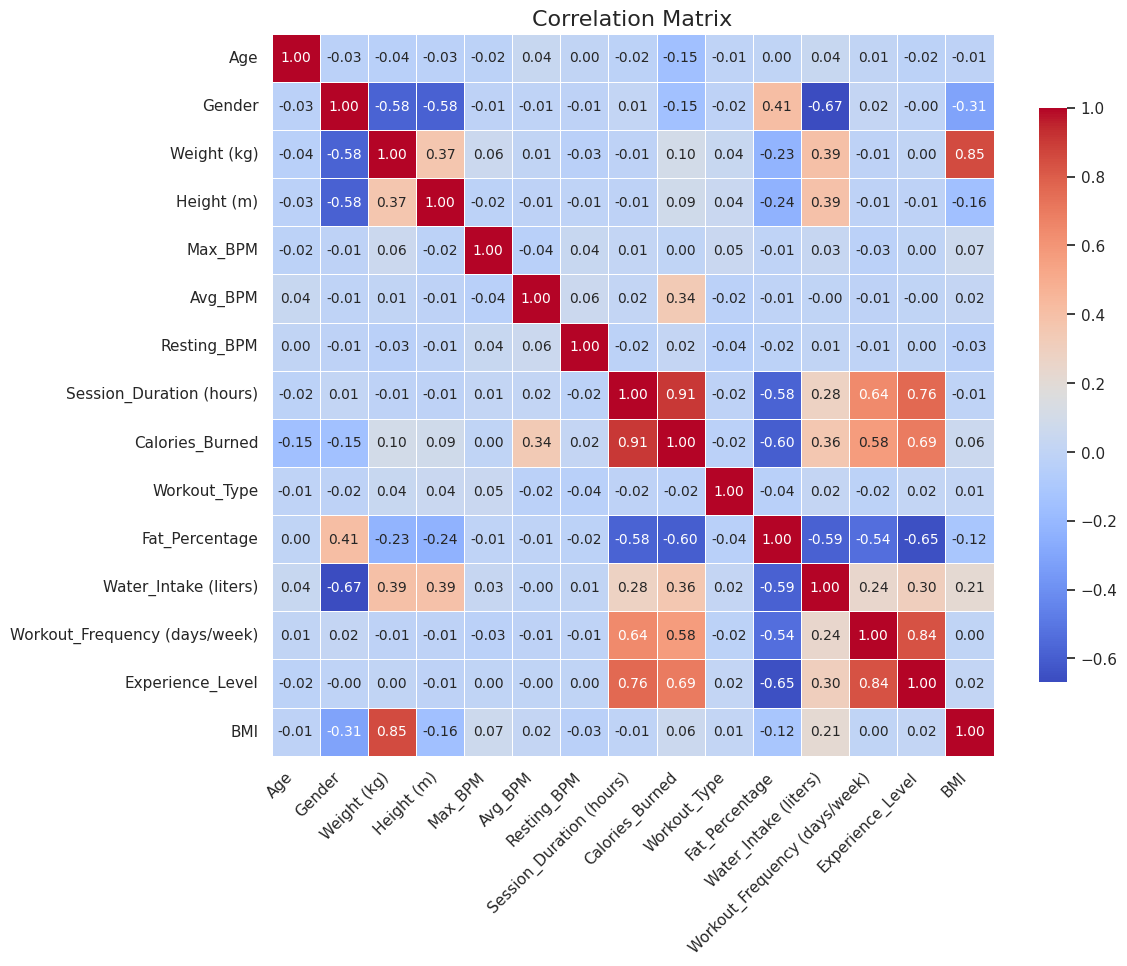

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a better figure size and style
plt.figure(figsize=(12, 10))
sns.set(style="white")

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .75},
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


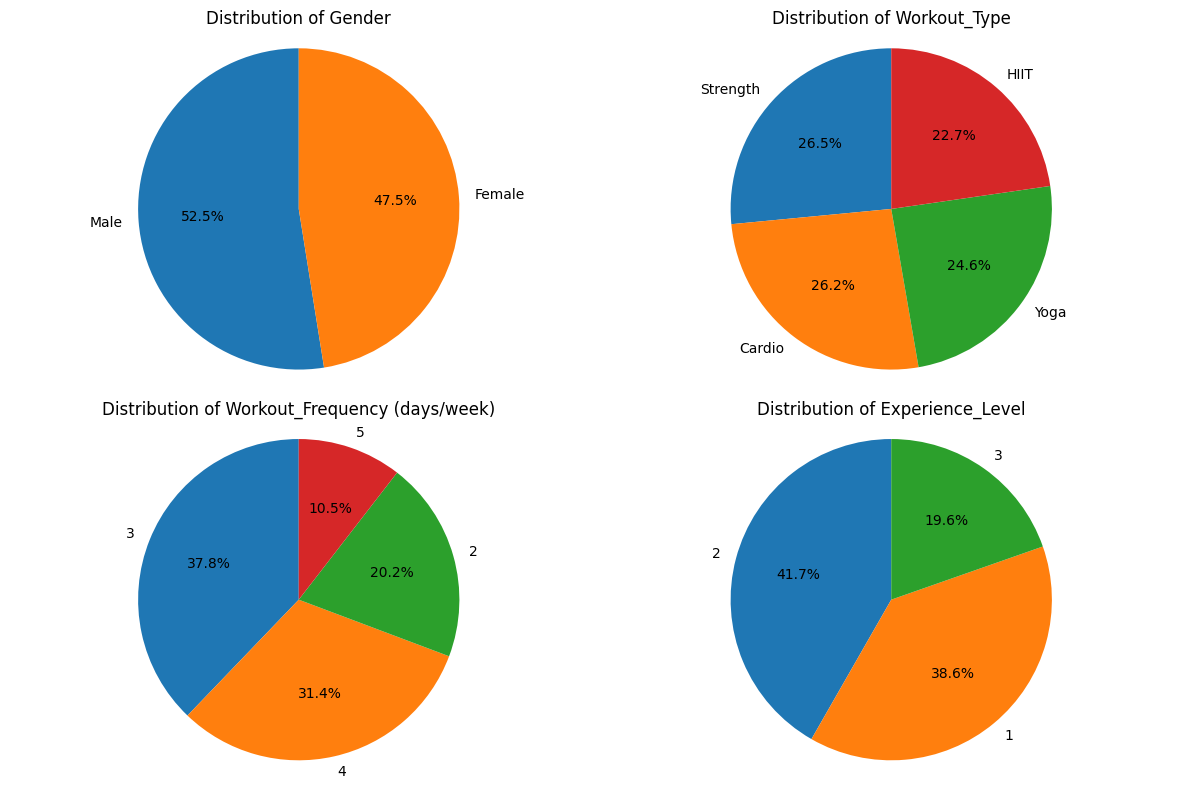

In [ ]:
import matplotlib.pyplot as plt

cat_columns = ['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']

num_cols = len(cat_columns)
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    value_counts = df[col].value_counts()
    axes[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10}
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].axis('equal')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Descriptive Analysis & Visualization


How does Age affect Max_BPM, Avg_BPM, or Resting_BPM?

→ Older individuals may have different heart rate patterns compared to younger ones.

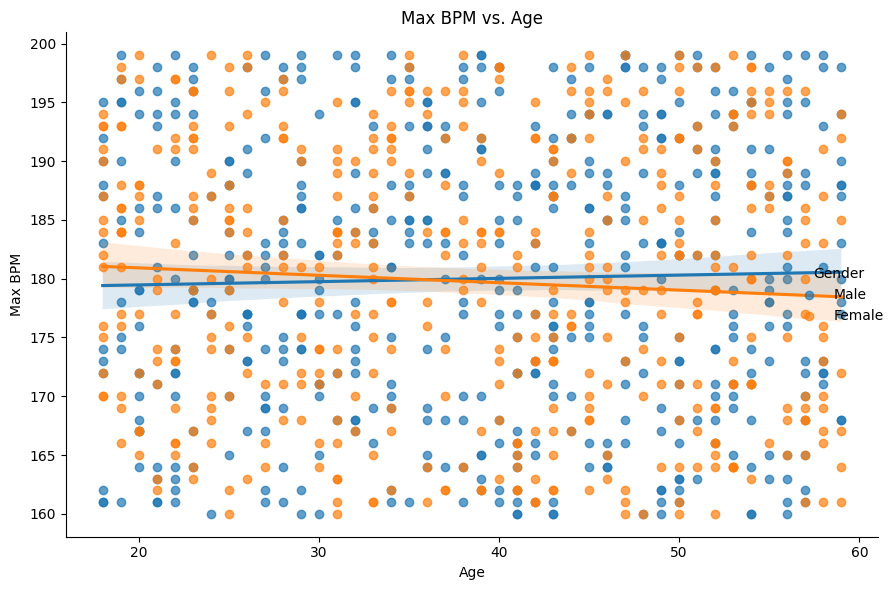

In [ ]:
sns.lmplot(
    data=df,
    x="Age",
    y="Max_BPM",
    hue="Gender",  # Optional: shows separate trend lines per gender
    height=6,
    aspect=1.33,
    scatter_kws={"alpha": 0.7}
)
plt.title("Max BPM vs. Age")
plt.xlabel("Age")
plt.ylabel("Max BPM")
plt.tight_layout()
plt.show()

How is BMI related to Fat_Percentage?

→ Does a higher BMI always indicate a higher fat percentage?


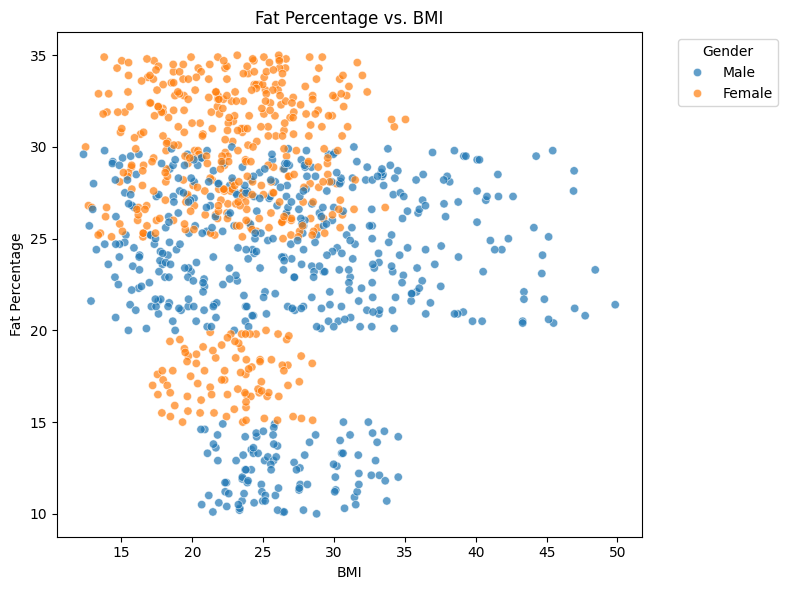

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="BMI",
    y="Fat_Percentage",
    hue="Gender",
    alpha=0.7
)
plt.title("Fat Percentage vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Fat Percentage")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Does Workout_Frequency correlate with Calories_Burned or Fat_Percentage?

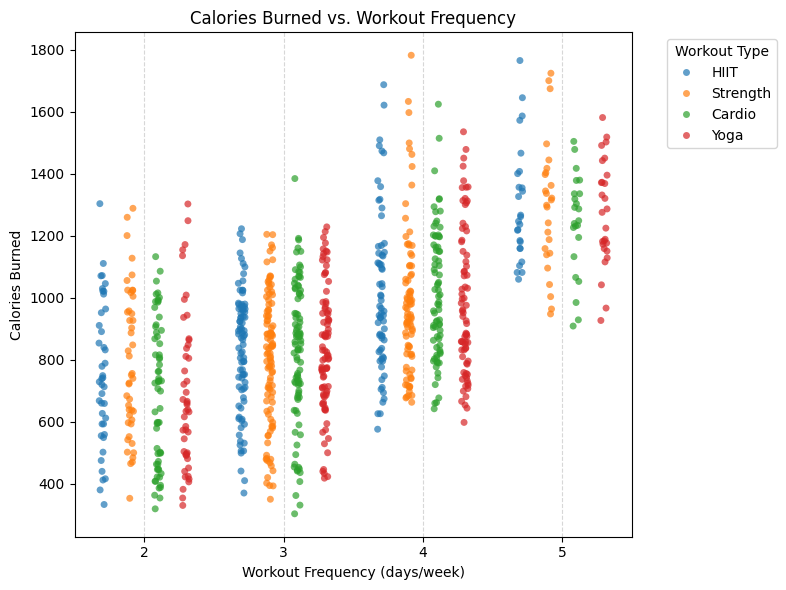

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(
    data=df,
    x="Workout_Frequency (days/week)",
    y="Calories_Burned",
    hue="Workout_Type",
    alpha=0.7,
    jitter=True,
    dodge=True  # separate points by hue
)
plt.title("Calories Burned vs. Workout Frequency")
plt.xlabel("Workout Frequency (days/week)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


What is the relationship between Weight and Calories_Burned?

→ Do heavier individuals burn more calories per session?

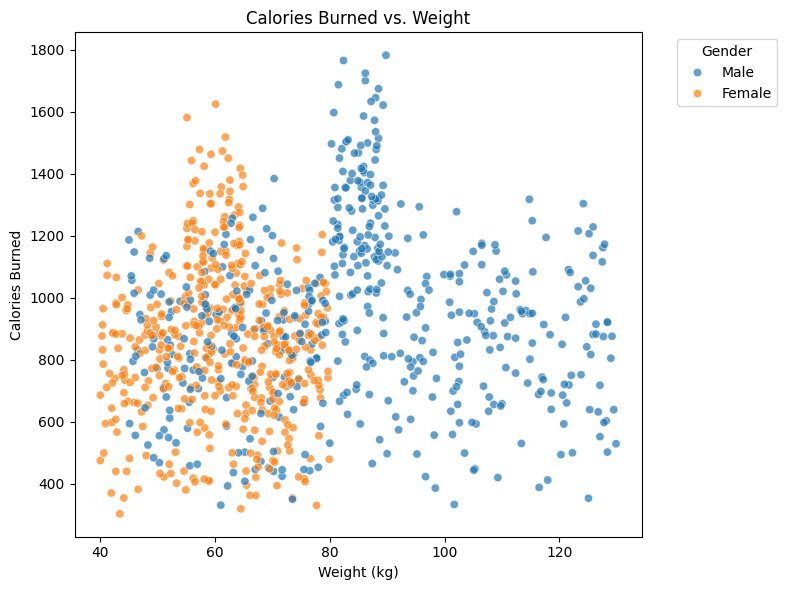

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Weight (kg)",
    y="Calories_Burned",
    hue="Gender",
    alpha=0.7
)
plt.title("Calories Burned vs. Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("Calories Burned")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Does Water_Intake affect Workout Performance (Calories_Burned or Avg_BPM)?

→ Are hydrated individuals performing better?

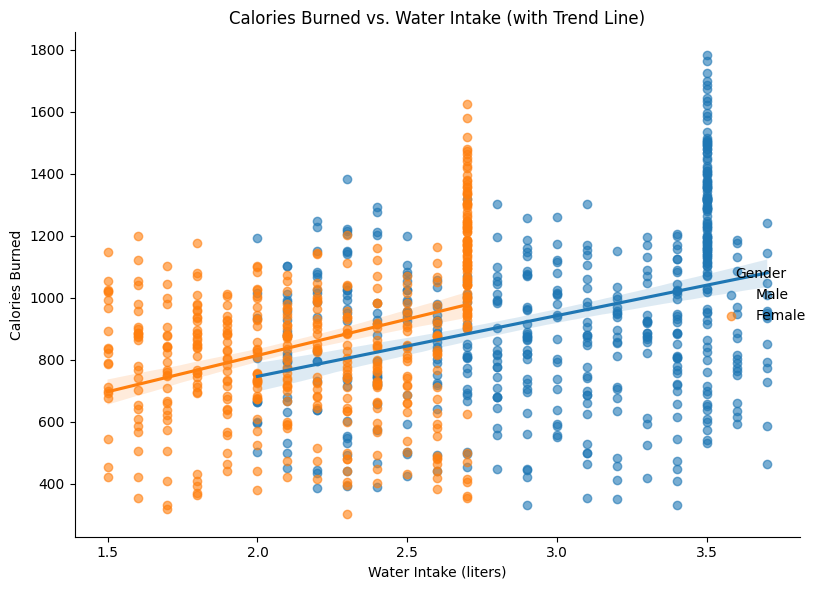

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df,
    x="Water_Intake (liters)",
    y="Calories_Burned",
    hue="Gender",
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.6}
)

plt.title("Calories Burned vs. Water Intake")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()

# Predictive Analytics


Mean Squared Error (MSE): 11289.338978665255
Root Mean Squared Error (RMSE): 106.25130106810578
R-squared (R²): 0.8360982637649799


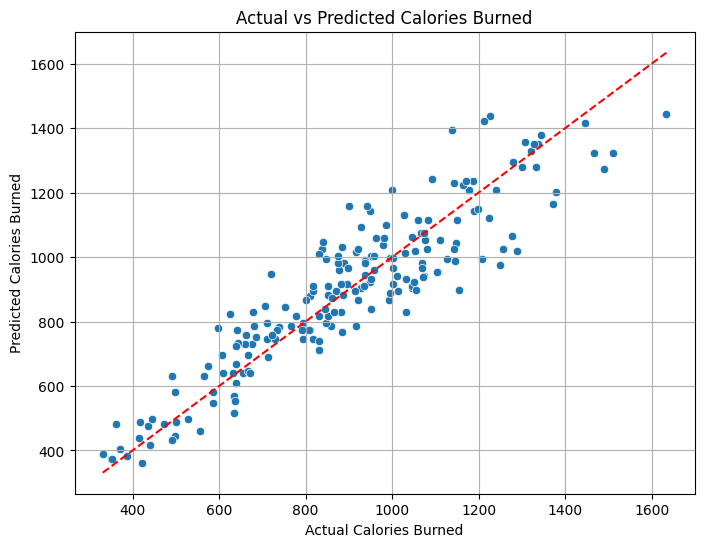

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Experience_Level', 'Session_Duration (hours)']]  # Features
y = df['Calories_Burned']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2702329664)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs Predicted Calories Burned')
plt.show()


In [ ]:
# User input
try:
    experience_input = float(input("Enter Experience Level (e.g., 0=Beginner, 1=Intermediate, 2=Advanced): "))
    session_duration_input = float(input("Enter Session Duration in hours (e.g., 1.0): "))

    user_input = pd.DataFrame([[experience_input, session_duration_input]],
                              columns=['Experience_Level', 'Session_Duration (hours)'])

    # Predict
    predicted_calories = model.predict(user_input)[0]
    print(f"Estimated Calories Burned: {predicted_calories:.2f}")

except ValueError:
    print("Please enter valid numerical values for both inputs.")

Enter Experience Level (e.g., 0=Beginner, 1=Intermediate, 2=Advanced): 2
Enter Session Duration in hours (e.g., 1.0): 1.5
Estimated Calories Burned: 1080.99
